# Plotting MAIA netCDF-4 PM Level 2 Data Variables

## Overview

In this notebook, we will access a local file of simulated MAIA Level 2 PM data. These simulated data are provided courtesy of the MAIA Project in netCDF-4 format. 

We will access the data file from local storage, load data variables into memory, and plot the data on a 2-D regional map over the Primary Target Area (PTA) of Los Angeles (USA).

### MAIA Orbital Targetting Simulation
<img src="https://maia.jpl.nasa.gov/assets/images/investigation/maia-sns5-12-main.gif" />

### MAIA Sequential Orbit Time
<img src="https://maia.jpl.nasa.gov/assets/images/investigation/maia-orbit-640.jpg" />

### Requirements

#### Python 3

Most of these imports are from the Python standard library. However, you will need to install these packages into your Python 3 environment if you have not already done so:

* netCDF4
* numpy
* matplotlib
* mpl_toolkits
* cartopy
* optparse
* IPython


## Notebook Author / Affiliation
David F. Moroni (david.f.moroni@jpl.nasa.gov) / Jet Propulsion Laboratory, Californa Institute of Technology

## Acknowledgements
The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004). 

© 2021 California Institute of Technology. Government sponsorship acknowledged.

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.axes
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from optparse import OptionParser
from netCDF4 import Dataset
from IPython.display import HTML

#### Read the netCDF file into memory

In [2]:
pm_file = "MAIA_L2_PM_PM-10-total_20190102T000000Z_XX_XXX_RXX_USA-LosAngeles_FXX_VXXpXXpXXpXX.nc"
print ( pm_file )

# -----------------------------
# Open netCDF4 file for reading
# -----------------------------
try:
    nc_file = Dataset( pm_file, 'r' )
except IOError:
    print ('not a valid netCDF file')

MAIA_L2_PM_PM-10-total_20190102T000000Z_XX_XXX_RXX_USA-LosAngeles_FXX_VXXpXXpXXpXX.nc


#### Open with the netCDF file, starting with reading in the Global Attributes.

In [3]:
def readGlobalAttrs( nc_file ):

  attr_list = []
  global_attr = []
  for attr_name in nc_file.ncattrs():
# print ( attr_name, '=', getattr(nc_file, attr_name) )
    attr_list.append( attr_name )
    atts = getattr( nc_file, attr_name )
    global_attr.append( atts )
  return attr_list, global_attr 

### Print the netCDF Global Attributes

In [4]:
print ('Global attributes:')
[attr_list, global_attr] = readGlobalAttrs( nc_file )

natts = len(attr_list)
for n in range(0, natts):
     print (attr_list[n]," = ",global_attr[n])

Global attributes:
title  =  GRM Level 2 Stage 2 PM Product
source  =  GRM Level 2 Stage 2 Daily PM Product is the result of application of GRM Level 2 Stage 1 regression coefficients to L2 aerosol retrievals and other ancillary data.
history  =  <date>: Initial production using software version <version tag>, built <build date>, by <user id>. See also Software_version_information and Input_files.
institution  =  MAIA products are generated by the MAIA Science Team, using processing and storage facilities of the NASA Langley Research Center Atmospheric Science Data Center (ASDC).
data_start_time  =  YYYY-MM-DDTHH:MM:SS.sssZ
data_end_time  =  YYYY-MM-DDTHH:MM:SS.sssZ
collection_number  =  CXX
local_granule_id  =  MAIA_[ProductLevel]_[ProductName]_[DateTimeStamp]_[ProcessingStrategy]_[QualityDesignator]_[ReprocessingVersion]_[TargetName]_[FormatVersion]_[DataVersion].nc
target_name  =  
input_files  =  A,B,C,...,X,Y,Z
coremetadata  =  <gmi:MI_Metadata xmlns:eos="http://earthdata.nasa.gov

### Read the netCDF Variables and Attribute Metadata

In [5]:
var_list = []
var_attr_list = []
var_data_list = []
def readVars ( nc_file ):
      vars =  nc_file.variables.keys()
      for var_name in vars:
          attr = nc_file.variables[var_name]
          vardata = nc_file.variables[var_name][:]
          var_attr_list.append( attr )
          var_data_list.append( vardata)
      return vars, var_attr_list, var_data_list

### Read and Describe the netCDF Un-Grouped Variable Attributes

In [6]:
print ('Un-Grouped netCDF Variables:')
[vars, var_attr_list, var_data_list] = readVars( nc_file )
nvars = len(vars)
print ('Number of Un-Grouped variables = ', nvars)
for i in range(0, nvars):
    vardata = var_data_list[i]
    print ('----------')
    print (var_attr_list[i])
    print (list(vars)[i], '[0:10] =\n', list(vardata)[0:10])

Un-Grouped netCDF Variables:
Number of Un-Grouped variables =  3
----------
<class 'netCDF4._netCDF4.Variable'>
float32 X_Dim(X_Dim)
    _FillValue: 9.96921e+36
    unit: meter
    standard_name: projection_x_coordinate
    long_name: Projection X Coordinate
    _CoordinateAxisType: GeoX
unlimited dimensions: X_Dim
current shape = (352,)
filling on
X_Dim [0:10] =
 [-175625.0, -174625.0, -173625.0, -172625.0, -171625.0, -170625.0, -169625.0, -168625.0, -167625.0, -166625.0]
----------
<class 'netCDF4._netCDF4.Variable'>
float32 Y_Dim(Y_Dim)
    _FillValue: 9.96921e+36
    unit: meter
    standard_name: projection_y_coordinate
    long_name: Projection Y Coordinate
    _CoordinateAxisType: GeoY
unlimited dimensions: Y_Dim
current shape = (420,)
filling on
Y_Dim [0:10] =
 [209625.0, 208625.0, 207625.0, 206625.0, 205625.0, 204625.0, 203625.0, 202625.0, 201625.0, 200625.0]
----------
<class 'netCDF4._netCDF4.Variable'>
int32 Albers_Equal_Area()
    semi_major_axis: 6378137.0
    inverse_fla

TypeError: iteration over a 0-d array

#### List the Un-grouped Variables

In [7]:
list(vars)

['X_Dim', 'Y_Dim', 'Albers_Equal_Area']

### Read the netCDF Group Variables

In [8]:
nc_file.groups

{'Geometric_Parameters': <class 'netCDF4._netCDF4.Group'>
 group /Geometric_Parameters:
     dimensions(sizes): 
     variables(dimensions): float32 Longitude(X_Dim, Y_Dim), float32 Latitude(X_Dim, Y_Dim)
     groups: ,
 'PM_10': <class 'netCDF4._netCDF4.Group'>
 group /PM_10:
     dimensions(sizes): 
     variables(dimensions): float32 PM_10_Total_Mean(X_Dim, Y_Dim), float32 PM_10_Total_Uncertainty(X_Dim, Y_Dim)
     groups: ,
 'PM_2.5': <class 'netCDF4._netCDF4.Group'>
 group /PM_2.5:
     dimensions(sizes): 
     variables(dimensions): float32 PM_2.5_Dust_Mean(X_Dim, Y_Dim), float32 PM_2.5_Dust_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_EC_Mean(X_Dim, Y_Dim), float32 PM_2.5_EC_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_Nitrate_Mean(X_Dim, Y_Dim), float32 PM_2.5_Nitrate_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_OC_Mean(X_Dim, Y_Dim), float32 PM_2.5_OC_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_Sulfate_Mean(X_Dim, Y_Dim), float32 PM_2.5_Sulfate_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_T

#### Read the Geometric Parameters Group Variables

In [9]:
grp_geo = nc_file.groups['Geometric_Parameters']

#### Describe the Geometric Group Variables

In [10]:
grp_geo

<class 'netCDF4._netCDF4.Group'>
group /Geometric_Parameters:
    dimensions(sizes): 
    variables(dimensions): float32 Longitude(X_Dim, Y_Dim), float32 Latitude(X_Dim, Y_Dim)
    groups: 

#### List the Geometric Group Variables

In [11]:
list(grp_geo.variables)

['Longitude', 'Latitude']

#### Read the PM 10 Group Variables

In [12]:
grp_pm10 = nc_file.groups['PM_10']

#### Describe the PM 10 Variables

In [13]:
grp_pm10

<class 'netCDF4._netCDF4.Group'>
group /PM_10:
    dimensions(sizes): 
    variables(dimensions): float32 PM_10_Total_Mean(X_Dim, Y_Dim), float32 PM_10_Total_Uncertainty(X_Dim, Y_Dim)
    groups: 

#### List the PM 10 Variables

In [14]:
list(grp_pm10.variables)

['PM_10_Total_Mean', 'PM_10_Total_Uncertainty']

#### Read the PM 2.5 Group Variables

In [15]:
grp_pm2d5 = nc_file.groups['PM_2.5']

#### Describe the PM 2.5 Variables

In [16]:
grp_pm2d5

<class 'netCDF4._netCDF4.Group'>
group /PM_2.5:
    dimensions(sizes): 
    variables(dimensions): float32 PM_2.5_Dust_Mean(X_Dim, Y_Dim), float32 PM_2.5_Dust_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_EC_Mean(X_Dim, Y_Dim), float32 PM_2.5_EC_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_Nitrate_Mean(X_Dim, Y_Dim), float32 PM_2.5_Nitrate_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_OC_Mean(X_Dim, Y_Dim), float32 PM_2.5_OC_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_Sulfate_Mean(X_Dim, Y_Dim), float32 PM_2.5_Sulfate_Uncertainty(X_Dim, Y_Dim), float32 PM_2.5_Total_Mean(X_Dim, Y_Dim), float32 PM_2.5_Total_Uncertainty(X_Dim, Y_Dim)
    groups: 

#### List the PM 2.5 Variables

In [17]:
list(grp_pm2d5.variables)

['PM_2.5_Dust_Mean',
 'PM_2.5_Dust_Uncertainty',
 'PM_2.5_EC_Mean',
 'PM_2.5_EC_Uncertainty',
 'PM_2.5_Nitrate_Mean',
 'PM_2.5_Nitrate_Uncertainty',
 'PM_2.5_OC_Mean',
 'PM_2.5_OC_Uncertainty',
 'PM_2.5_Sulfate_Mean',
 'PM_2.5_Sulfate_Uncertainty',
 'PM_2.5_Total_Mean',
 'PM_2.5_Total_Uncertainty']

#### Reading the Discrete Variables within the Variable Groups

In [18]:
lon = grp_geo.variables['Longitude'][:]
lat = grp_geo.variables['Latitude'][:]
pm_10_total = grp_pm10.variables['PM_10_Total_Mean'][:]
pm_10_uncert = grp_pm10.variables['PM_10_Total_Uncertainty'][:]

In [19]:
print, lon

(<function print>,
 masked_array(
   data=[[-120.57638 , -120.57616 , -120.575935, ..., -120.487076,
          -120.48687 , -120.486664],
         [-120.565125, -120.5649  , -120.564674, ..., -120.47632 ,
          -120.47612 , -120.475914],
         [-120.55386 , -120.55365 , -120.55342 , ..., -120.465576,
          -120.46537 , -120.465164],
         ...,
         [-116.64613 , -116.646355, -116.64658 , ..., -116.73443 ,
          -116.734634, -116.73483 ],
         [-116.63488 , -116.6351  , -116.63533 , ..., -116.72368 ,
          -116.723885, -116.72409 ],
         [-116.62363 , -116.62384 , -116.62407 , ..., -116.71293 ,
          -116.713135, -116.71334 ]],
   mask=False,
   fill_value=1e+20,
   dtype=float32))

In [20]:
print, lat

(<function print>,
 masked_array(
   data=[[37.171444, 37.162437, 37.153427, ..., 33.415184, 33.40617 ,
          33.397156],
         [37.171623, 37.162617, 37.153606, ..., 33.415356, 33.40634 ,
          33.397327],
         [37.171803, 37.162792, 37.153786, ..., 33.415524, 33.40651 ,
          33.397495],
         ...,
         [37.171803, 37.162792, 37.153786, ..., 33.415524, 33.40651 ,
          33.397495],
         [37.171623, 37.162617, 37.153606, ..., 33.415356, 33.40634 ,
          33.397327],
         [37.171444, 37.162437, 37.153427, ..., 33.415184, 33.40617 ,
          33.397156]],
   mask=False,
   fill_value=1e+20,
   dtype=float32))

### Generate a "Psuedo" AlbersEqualArea 2-D Lat/Lon Map of PM 10 Total Mean

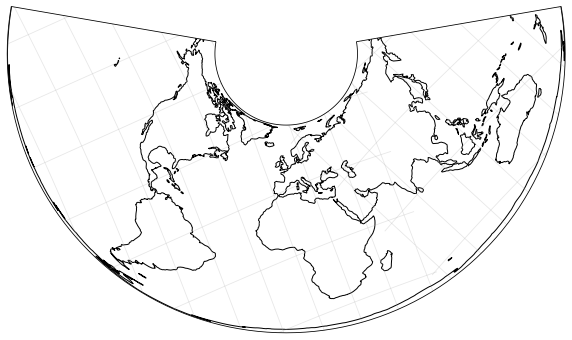

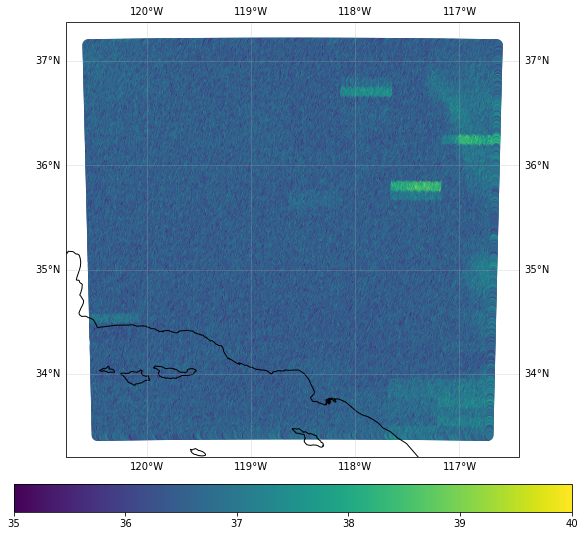

Units = micrograms m^-3


In [72]:
plt.figure(figsize=(10, 10))

ax1 = plt.axes(projection=ccrs.AlbersEqualArea())
ax1.gridlines(crs=ccrs.AlbersEqualArea(central_longitude=-118.6, central_latitude=35.3, false_easting=0.0, false_northing=0.0, standard_parallels=(33.3, 37.3), globe=None), alpha=0.3)
ax1.coastlines()

plt.figure(figsize=(10, 10))

ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
ax2.coastlines()

x = ax2.scatter(lon[:], lat[:], c=pm_10_total[:], lw=2, vmin=35., vmax=40.)

plt.colorbar(x, orientation='horizontal', pad=0.05)
plt.show()
print('Units = micrograms m^-3')

### Generate PlateCarree 2-D Lat/Lon Map of PM 10 Total Mean

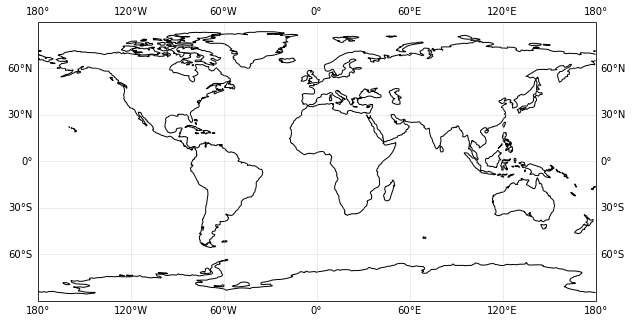

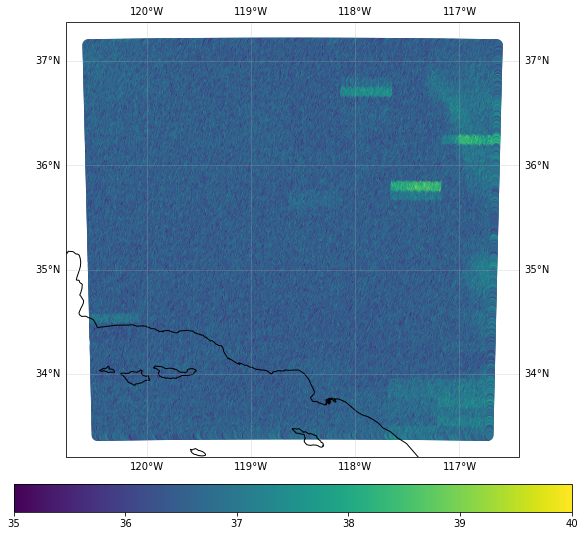

Units = micrograms m^-3


In [52]:
plt.figure(figsize=(10, 10))

ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
ax1.coastlines()

plt.figure(figsize=(10, 10))

ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
ax2.coastlines()

x = ax2.scatter(lon[:], lat[:], c=pm_10_total[:], lw=2, vmin=35., vmax=40.)

plt.colorbar(x, orientation='horizontal', pad=0.05)
plt.show()
print('Units = micrograms m^-3')

### Generate a 2-D Lat/Lon Map of PM 10 Total Uncertainty

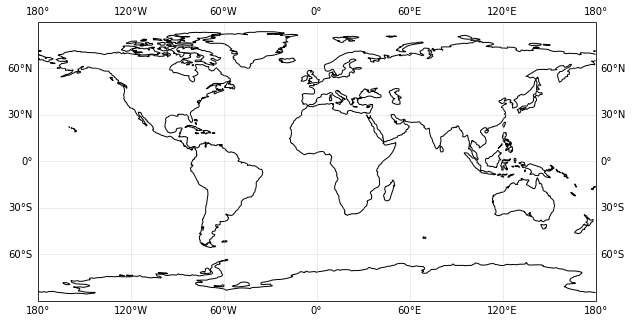

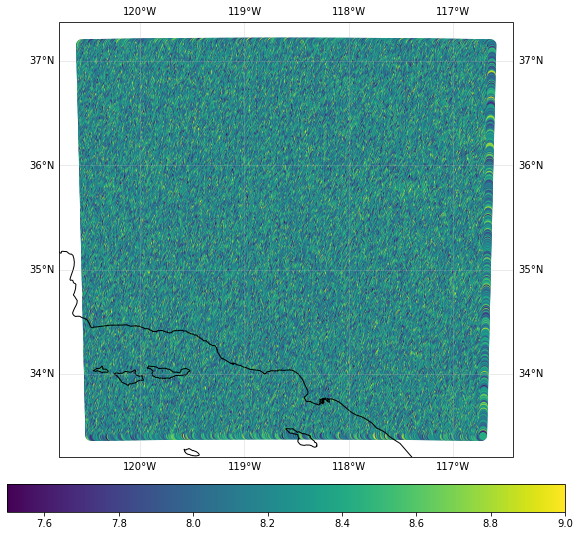

Units = micrograms m^-3


In [74]:
plt.figure(figsize=(10, 10))

ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
ax1.coastlines()

plt.figure(figsize=(10, 10))

ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
ax2.coastlines()

x = ax2.scatter(lon[:], lat[:], c=pm_10_uncert[:], lw=2, vmin=7.5, vmax=9.)

plt.colorbar(x, orientation='horizontal', pad=0.05)
plt.show()
print('Units = micrograms m^-3')